<style>
 
{
  margin: 0;
  padding: 0;
  box-sizing: border-box;}

  body {
  margin-left: -24px;
  margin-top: 0;
  font-family: "Arial", sans-serif;
  width: 100%;
  height: 100vh;
  display: flex;
  flex-direction: column;
  justify-content: space-between;
  box-sizing: border-box;
}
  .title {
    text-align: center;
    font-size: 36px; 
    font-weight: bold;
    align-items: center;
    margin-top: 50px; 
  }
  .subtitle {
    text-align: center;
    font-size: 28px; 
    font-weight: bold;
    align-items: center;
    margin-bottom: 30px;
  }
  .logo {
    text-align: center;
    margin: 50px 0; 
    align-items: center;
  }
  .project-title {
    text-align: center;
    font-size: 28px; 
    font-weight: bold;
    align-items: center;
    margin: 40px 0; 
  }
  .authors {
    font-size: 20px; 
    text-align: center;
    margin-bottom: 50px;
    align-items: center;
  }
</style>

<div class="title">POLITECHNIKA LUBELSKA</div>
<div class="subtitle">WYDZIAŁ MATEMATYKI I INFORMATYKI TECHNICZNEJ</div>
<div class="subtitle">Kierunek: Inżynieria i Analiza Danych</div>

<div class="logo">
  <img src="logo/logopl.png" alt="Logo Politechniki Lubelskiej" width="300"> <!-- Większe logo -->
</div>

<div class="project-title">Projekt Zaliczeniowy z Zakresu Metod Walidacji</div>
<div class="subtitle"><em>Praca wykonana przez:</em></div>
<div class="authors">
  <strong>Andrii Zapukhlyi, Nr albumu: s100935</strong> <br>
  <strong>Mateusz Drozd, Nr albumu: s100966</strong> <br>
</div>

## Zbiór Danych
Zbiór danych „Air Quality UCI” zawiera 9 358 instancji godzinnych uśrednionych odpowiedzi pięciu czujników półprzewodnikowych (metal-oxide) zainstalowanych w urządzeniu wieloczujnikowym do monitoringu jakości powietrza w terenie, wraz z jednoczesnymi pomiarami referencyjnymi stężeń zanieczyszczeń przez certyfikowany analizator.  
Dane obejmują okres od marca 2004 do lutego 2005 (13 miesięcy).  

| Nr | Nazwa zmiennej               | Opis                                                                                   |
| -- | ---------------------------- | -------------------------------------------------------------------------------------- |
| 0  | **Date**                     | Data pomiaru w formacie DD/MM/YYYY                                                     |
| 1  | **Time**                     | Godzina pomiaru w formacie HH.MM.SS                                                    |
| 2  | **True CO (mg/m³)**          | Rzeczywiste stężenie tlenku węgla (CO) zmierzone przez analizator referencyjny         |
| 3  | **PT08.S1 (tin oxide)**      | Odpowiedź sensora tlenku cyny (nominalnie celowanego w CO)                             |
| 4  | **True NMHC (µg/m³)**        | Rzeczywiste stężenie węglowodorów niemetanicznych (NMHC) przez analizator referencyjny |
| 5  | **True Benzene (µg/m³)**     | Rzeczywiste stężenie benzenu przez analizator referencyjny                             |
| 6  | **PT08.S2 (titania)**        | Odpowiedź sensora tlenku tytanu (nominalnie celowanego w NMHC)                         |
| 7  | **True NOx (ppb)**           | Rzeczywiste stężenie tlenków azotu (NOx) w ppb przez analizator referencyjny           |
| 8  | **PT08.S3 (tungsten oxide)** | Odpowiedź sensora tlenku wolframu (nominalnie celowanego w NOx)                        |
| 9  | **True NO₂ (µg/m³)**         | Rzeczywiste stężenie dwutlenku azotu (NO₂) przez analizator referencyjny               |
| 10 | **PT08.S4 (tungsten oxide)** | Odpowiedź sensora tlenku wolframu (nominalnie celowanego w NO₂)                        |
| 11 | **PT08.S5 (indium oxide)**   | Odpowiedź sensora tlenku indu (nominalnie celowanego w O₃)                             |
| 12 | **Temperature (°C)**         | Temperatura powietrza w stopniach Celsjusza                                            |
| 13 | **Relative Humidity (%)**    | Wilgotność względna powietrza w procentach                                             |
| 14 | **Absolute Humidity**        | Wilgotność bezwzględna (AH)                                                            |


### Charakterystyka danych
- **Typ:** Wielozmiennowy, szereg czasowy.  
- **Zadanie:** Regresja.  
- **Typ cech:** wartości rzeczywiste (float).  
- **Liczba instancji:** 9 358.  
- **Liczba cech:** 15.  

### Obsługa braków
Brakujące wartości oznaczono wartością `-200` w komórkach sensorów i analizatorów – wymagana wstępna obróbka zmiennych.


## Cel projektu

Celem projektu jest zbudowanie modelu regresyjnego, który na podstawie dostępnych pomiarów (wszystkich kolumn z wyjątkiem `Date` i `Time`) będzie w stanie jak najdokładniej przewidzieć godzinową wartość stężenia benzenu (`C6H6(GT)`). W tym celu:

**wszystkie zmienne użyte do przewidywania (`C6H6(GT)`):**  
   - Odpowiedzi pięciu sensorów półprzewodnikowych (`PT08.S1(CO)`, `PT08.S2(NMHC)`, `PT08.S3(NOx)`, `PT08.S4(NO2)`, `PT08.S5(O3)`)  
   - Pomiary referencyjne innych gazów (`CO(GT)`, `NMHC(GT)`, `NOx(GT)`, `NO2(GT)`)  
   - Warunki meteorologiczne (`T`, `RH`, `AH`)  



In [62]:
import pandas as pd

df = pd.read_csv(
    'data\AirQualityUCI.csv',
    sep=';',
    decimal=',',
)
df.head().iloc[:,11:17]


,PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,972.0,13.3,47.7,0.7255,NaN,NaN
2,1074.0,11.9,54.0,0.7502,NaN,NaN
3,1203.0,11.0,60.0,0.7867,NaN,NaN
4,1110.0,11.2,59.6,0.7888,NaN,NaN


Ponieważ kolumny `"Unnamed: 15"` i `"Unnamed: 16"` zawierają wyłącznie brakujące wartości (–200 lub NaN) oraz  ze względu na nasz cel projektu nie potrzebujemy pól daty i czasu (`"Date"`, `"Time"`), usuwamy je przed dalszą analizą.

In [69]:
import numpy as np
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16", "Date", "Time"])
df.replace(-200.0, np.nan, inplace=True)
df = df[:-114]

W ramach oczyszczania danych usunięto ostatnie 144 wiersze, które nie zawierały żadnych wartości (były w całości puste). Dzięki temu otrzymaliśmy spójniejszy zbiór, wolny od „pustych” rekordów, co ułatwia dalsze analizy statystyczne, wizualizacje oraz modelowanie.

In [49]:
df = df.fillna(df.median(numeric_only=True))

In [70]:
print("Podstawowe informacje o zbiorze danych:")
print(df.info())

Podstawowe informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB
None


In [71]:
print("Ilość brakujących wartości w zbiorze: ")
print(df.isnull().sum())

Ilość brakujących wartości w zbiorze: 
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [41]:
df.shape

(9357, 10)

In [37]:
dtale = dt.show(df)


In [38]:
dtale

# Statystyki opisowe

In [58]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [72]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr = df['PT08.S3(NOx)']
print('Wartość średnia:       %.4f' % arr.mean())
print('Wartość maksymalna:    %.4f' % arr.max())
print('Wartość minimalna:     %.4f' % arr.min())
print('Odchylenie standardowe: %.4f' % arr.std())
print('Wariancja:             %.4f' % arr.var())
print('Skośność:              %.4f' % st.skew(arr))
print('Kurtoza:               %.3f' % st.kurtosis(arr))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr, 0.75))

Wartość średnia:       835.4936
Wartość maksymalna:    2683.0000
Wartość minimalna:     322.0000
Odchylenie standardowe: 256.8173
Wariancja:             65955.1359
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


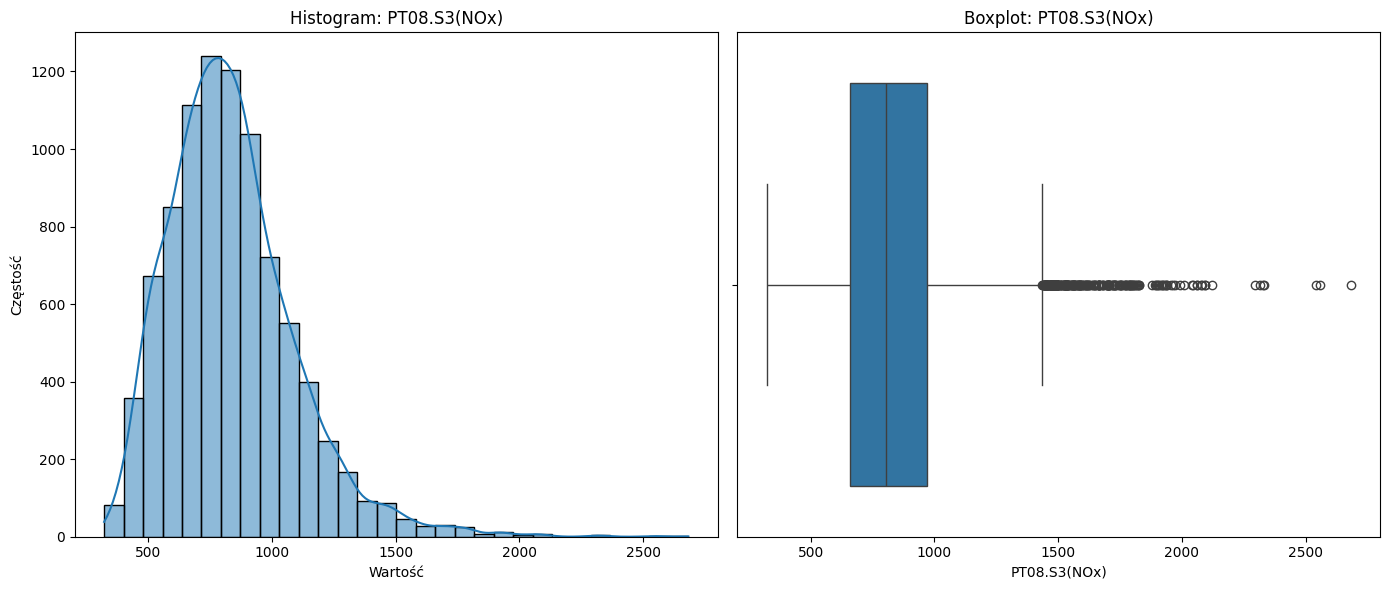

In [73]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr, kde=True, bins=30)
plt.title("Histogram: PT08.S3(NOx)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr)
plt.title("Boxplot: PT08.S3(NOx)")
plt.xlabel("PT08.S3(NOx)")

plt.tight_layout()
plt.show()

### Histogram

* **Kształt rozkładu:** wyraźny szczyt (moda) w okolicach 800–1 000, a dalej gwałtowny spadek częstości — większość odczytów mieści się między \~500 a \~1 200.
* **Skośność:** rozkład przesunięty w prawo (pojedyncze sporadyczne, wysokie odczyty NOx powodują długi ogon).
* **Gęstość:** dolne wartości (< 500) i bardzo wysokie (> 1 500) zdarzają się rzadko.

### Boxplot

* **Mediana (linia wewnątrz pudełka):** wypada około **800**, co oznacza, że połowa wszystkich odczytów jest mniejsza niż ta wartość.
* **Wartości w przedziale między 25% (650) a 75% (970)** stanowią większość danych (IQR – interquartile range).  
* **Wartości odstające (outliers):** liczne punkty poza wąsami po prawej stronie – świadczą o sporadycznych skokowych wzrostach odczytu NOx, które mogą być spowodowane np. nagłą zmianą warunków atmosferycznych.


In [82]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr1 = df['NO2(GT)']
print('Wartość średnia:       %.4f' % arr1.mean())
print('Wartość maksymalna:    %.4f' % arr1.max())
print('Wartość minimalna:     %.4f' % arr1.min())
print('Odchylenie standardowe: %.4f' % arr1.std())
print('Wariancja:             %.4f' % arr1.var())
print('Skośność:              %.4f' % st.skew(arr1))
print('Kurtoza:               %.3f' % st.kurtosis(arr1))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr1, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr1, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr1, 0.75))


Wartość średnia:       113.0913
Wartość maksymalna:    340.0000
Wartość minimalna:     2.0000
Odchylenie standardowe: 48.3701
Wariancja:             2339.6673
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


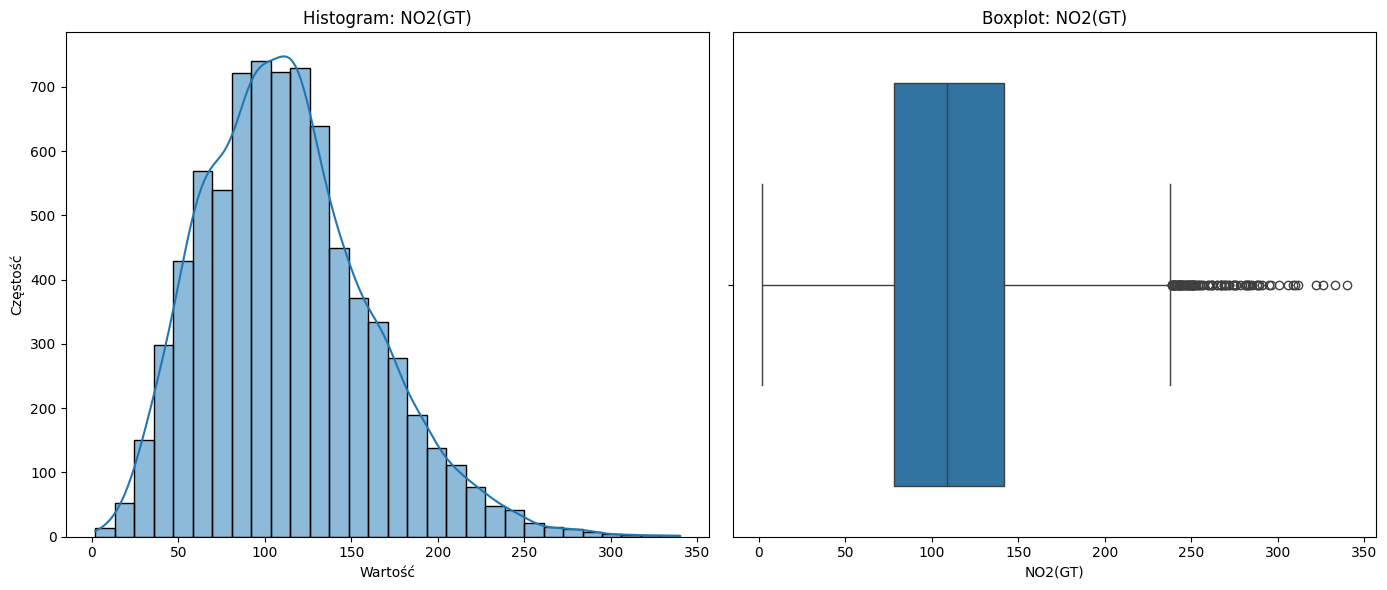

In [84]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: NO2(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: NO2(GT)")
plt.xlabel("NO2(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **NO2(GT)**

### Histogram: NO2(GT)
- **Kształt rozkładu**  
  Rozkład jest lekko prawoskośny, z większością obserwacji skupionych pomiędzy ~80 a ~160.  
- **Modalna wartość**  
  Najwięcej godzinnych odczytów wypada około 100–120.  
- **Ogon rozkładu**  
  Pojawiają się sporadyczne, wyższe wartości powyżej 200, które nadają rozkładowi długi prawy ogon.  
- **Gęstość i rozrzut**  
  Dolne wartości (< 50 ) oraz bardzo wysokie (> 250) są rzadkie.

### Boxplot: NO2(GT)
* **Mediana** wynosi około 115, co oznacza, że połowa pomiarów ma stężenie benzenu poniżej tej wartości.  
* **Wartości w przedziale między 25% (80) a 75% (145)** stanowią większość danych (IQR – interquartile range).    
* **Wartości odstające** liczne punkty powyżej górnego wąsa świadczą o kilkunastu skokowych wzrostach stężenia NO₂.



In [85]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki:
arr2 = df['C6H6(GT)']
print('Wartość średnia:       %.4f' % arr2.mean())
print('Wartość maksymalna:    %.4f' % arr2.max())
print('Wartość minimalna:     %.4f' % arr2.min())
print('Odchylenie standardowe: %.4f' % arr2.std())
print('Wariancja:             %.4f' % arr2.var())
print('Skośność:              %.4f' % st.skew(arr2))
print('Kurtoza:               %.3f' % st.kurtosis(arr2))
print('Kwantyl 0.25:          %.4f' % np.quantile(arr2, 0.25))
print('Kwantyl 0.50 (mediana):%.4f' % np.quantile(arr2, 0.50))
print('Kwantyl 0.75:          %.4f' % np.quantile(arr2, 0.75))


Wartość średnia:       10.0831
Wartość maksymalna:    63.7000
Wartość minimalna:     0.1000
Odchylenie standardowe: 7.4498
Wariancja:             55.4998
Skośność:              nan
Kurtoza:               nan
Kwantyl 0.25:          nan
Kwantyl 0.50 (mediana):nan
Kwantyl 0.75:          nan


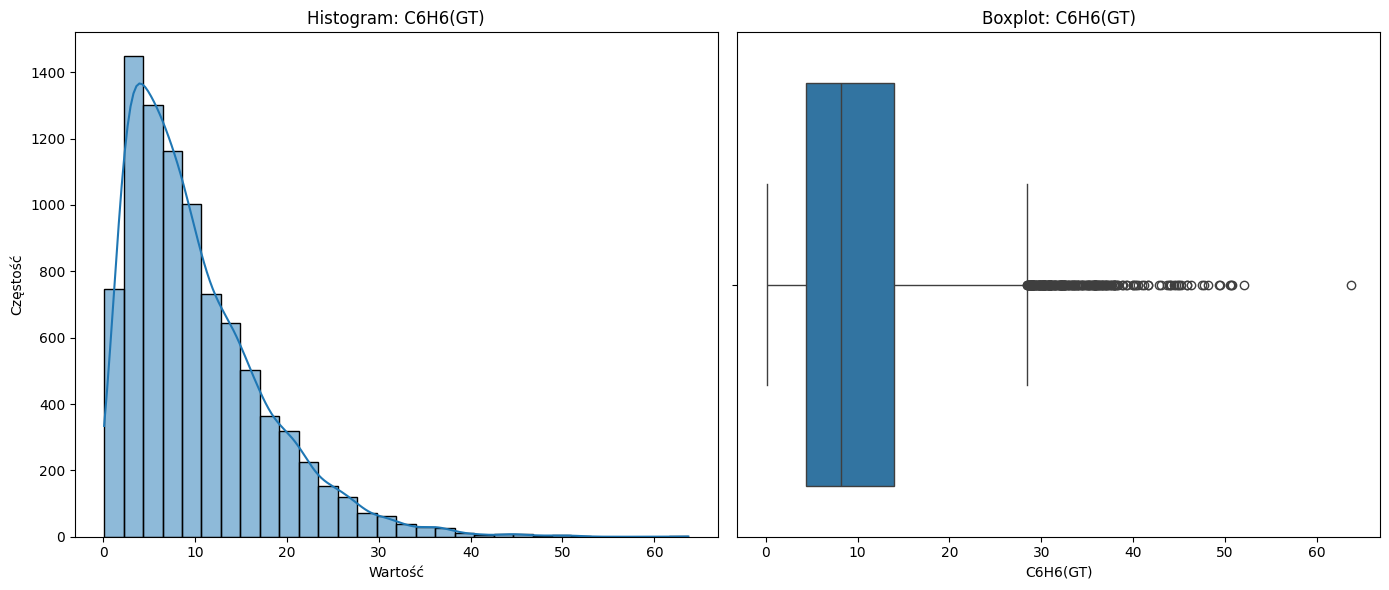

2025-05-16 14:12:59,582 - INFO     - Executing shutdown due to inactivity...
2025-05-16 14:13:19,836 - INFO     - Executing shutdown...
2025-05-16 14:13:19,836 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [ ]:
# Wykresy:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr2, kde=True, bins=30)
plt.title("Histogram: C6H6(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr2)
plt.title("Boxplot: C6H6(GT)")
plt.xlabel("C6H6(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **C6H6(GT)**

### Histogram: C6H6(GT)
- **Kształt rozkładu**  
  Wyraźnie prawoskośny rozkład – większość wartości skupia się przy niskich stężeniach benzenu, natomiast sporadyczne obserwacje o wysokich wartościach tworzą długi prawy ogon.
- **Modalna wartość**  
  Najwięcej odczytów wypada w okolicach 5–10.
- **Ogon rozkładu**  
  Stężenia powyżej ~20  są rzadkie, ale sięgają nawet ponad 60.
- **Gęstość i rozrzut**  
  Bardzo niskie wartości (< 2) oraz bardzo wysokie (> 30) zdarzają się rzadko.

### Boxplot: C6H6(GT)
* **Mediana** wynosi w około 8, co oznacza, że połowa pomiarów ma stężenie benzenu poniżej tej wartości.
* **Wartości w przedziale między 25% (5) a 75% (15)** stanowią większość danych (IQR – interquartile range).
* **Wartości odstające**  Liczne punkty powyżej górnego wąsa (20–60) wskazują na sporadyczne epizody podwyższonego stężenia benzenu, które mogą wynikać z lokalnych zdarzeń (np. wzmożony ruch samochodowy, prace remontowe, itp.).
